In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read the data

In [3]:
sample = pd.read_csv(r".\bank\bank-full.csv"\
                    ,sep=';')

In [64]:
sample.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [65]:
sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Range

Range of a data is given by the difference in the maximum and minimum elements in the data under observation.

In [66]:
score = sample["age"]

In [67]:
minimum_value  = np.min(score)
maximum_value = np.max(score)

print("The maximum value:",maximum_value)
print("The minimum value:",minimum_value)
print("The range of the data is:",(maximum_value - minimum_value))

The maximum value: 95
The minimum value: 18
The range of the data is: 77


In [68]:
def plot_fn(maximum_value,minimum_value,histogram,score,bins):
    plt.hist(score,bins,color = 'gray', alpha=0.5, histtype='bar', ec='black')
    plt.axvline(x=maximum_value, color='red')
    plt.axvline(x=minimum_value, color='green')
    plt.show()

In [69]:
histogram, bins = np.histogram(score,bins=np.arange(minimum_value - 0.5,maximum_value+0.5,5))

In [70]:
histogram, bins

(array([ 305, 2745, 8061, 9298, 6841, 5776, 4777, 4114, 2333,  327,  253,
         196,  122,   49,    9], dtype=int64),
 array([17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5,
        72.5, 77.5, 82.5, 87.5, 92.5]))

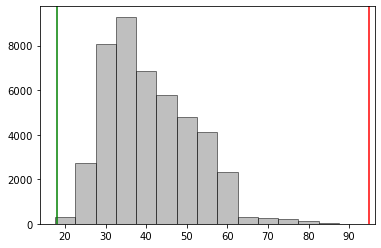

In [71]:
plot_fn(maximum_value,minimum_value,histogram,score,bins)

The maximum value from the range looks like an outlier. If the outliers where removed the range of the dataset would have been different. 
*Example:* Most data is centered around 10-65. So, the range of ange group people is around 45. 

## IQR

IQR(Inter Quratile range) -  Q3 - Q1 

**Q1** = 25th percentile of the data 

**Q3** = 75th percentile of the data




Percentile calculation is given by:

*$L_p$ denote the position of pth percentile*

$L_p = (p/100) * (n+1)$, where n denotes number of data points in a sample.

$i = L_pi$ (integer part of $L_p$)

$fp = L_pf$ (fractional part of $L_p$)

$j = i+1$

$Q_p = X_i + f_p * (X_j - X_i)$

In [72]:
score = score.sort_values()

In [73]:
# First quartile (Q1)
Q1 = np.percentile(score, 25, interpolation = 'midpoint')

print("Quartile 1(Q1) = ",Q1,"\n")

# Third quartile (Q3)
Q3 = np.percentile(score, 75, interpolation = 'midpoint')

print("Quartile 3(Q3) = ",Q3,"\n")

# Interquaritle range (IQR)
IQR = Q3 - Q1

print("IQR = ",IQR)


Quartile 1(Q1) =  33.0 

Quartile 3(Q3) =  48.0 

IQR =  15.0


The IQR is not sensitive to outliers as it always considers 50% of the data between 25th & 75th percentile. 

*Formula for outliers:*

$Q1 - (1.5 * IQR)$ or $Q3 + (1.5 * IQR)$

In [74]:
left_outliers = Q1 - (1.5 * IQR)
right_outliers = Q3 + (1.5 * IQR)

print("On the left, the values below ",left_outliers," are outliers")
print("On the right, the values above ",right_outliers," are outliers")

On the left, the values below  10.5  are outliers
On the right, the values above  70.5  are outliers


The IQR is not susceptible to outliers as it always consider data within the range of above 25 percentile & below 75 percentile

The median of the data is considered to be the 50th percentile and is Q2

In [75]:
Q2 = np.median(score)

In [76]:
def plot_Quartiles(Quartile_number,color):
    plt.axvline(x=Quartile_number,color=color)

In [77]:
def plot_IQR(Q1,Q2,Q3,histogram,bins,score):
    plt.hist(score,bins,color = 'gray', alpha=0.5, histtype='bar', ec='black')
    plot_Quartiles(Q1,"green")
    plot_Quartiles(Q2,"blue")
    plot_Quartiles(Q3,"red")
    plt.axvline(x=right_outliers,color="brown",linestyle='--')
    plt.axvline(x=left_outliers,color="magenta",linestyle='--')
    plt.legend(["Q1","Q2","Q3","Max End","Min End"],loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.show()

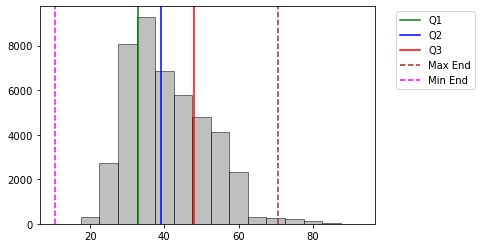

In [78]:
plot_IQR(Q1,Q2,Q3,histogram,bins,score)

Clearly we observe that the maximum value of the list is an outlier. 

{'whiskers': [<matplotlib.lines.Line2D at 0x191910d9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x191910d93d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x191910accd0>],
 'medians': [<matplotlib.lines.Line2D at 0x191914b7340>],
 'fliers': [<matplotlib.lines.Line2D at 0x191914b70d0>],
 'means': []}

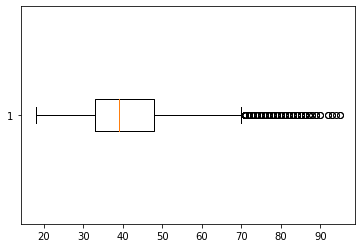

In [79]:
plt.boxplot(score, vert = 0)

We see from the box plot that the data is as expected right skewed, and has couple of values after the maximum layer

## Variance 

In [80]:
import statistics

variance = statistics.variance(score)

print("The variance of the data is:",variance)

The variance of the data is: 112.7581072828605


## Standard Deviation

In [81]:
stddev = np.sqrt(variance)

print("The std dev of the data is:",stddev)

The std dev of the data is: 10.61876204097542


## Mean

In [82]:
mean = np.mean(score)

print("The mean of the data is:",mean)

The mean of the data is: 40.93621021432837


The data varies 10 standard deviations from the mean both towards left and towards right.

# Sensitivity of Outliers

In [83]:
df = score[score< right_outliers]

In [84]:
new_variance = statistics.variance(df)

print("The variance of the data is:",new_variance)

The variance of the data is: 99.56510774849566


In [85]:
new_stddev = np.sqrt(new_variance)

print("The std dev of the data is:",new_stddev)

The std dev of the data is: 9.978231694468498


In [86]:
new_minimum_value  = np.min(df)
new_maximum_value = np.max(df)

print("The maximum value:",new_maximum_value)
print("The minimum value:",new_minimum_value)
print("The range of the data is:",(new_maximum_value - new_minimum_value))

The maximum value: 70
The minimum value: 18
The range of the data is: 52


In [87]:
def PlotChangesMoS(old_val, new_val,bins, score, old_label, new_label):
    plt.hist(score,bins,color = 'gray', alpha=0.5, histtype='bar', ec='black')
    plt.axvline(x=old_val,color="brown",linestyle='--')
    plt.axvline(x=new_val,color="magenta",linestyle='--')
    plt.xlabel("age")
    plt.ylabel("frequency")
    plt.legend([old_label,new_label])
    plt.show()

## Plot the change in Measures of Spread

--------------------------------
Std Deviation


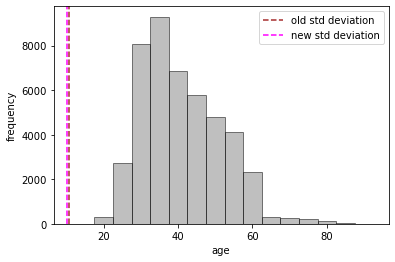

--------------------------------
Variance


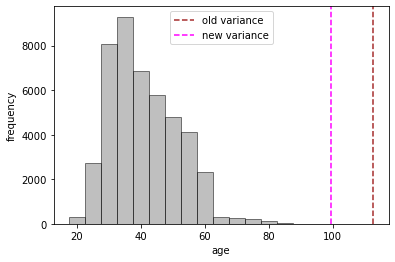

--------------------------------
Range


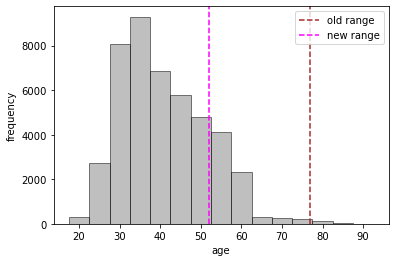

In [88]:
print("--------------------------------")
print("Std Deviation")
PlotChangesMoS(stddev, new_stddev,bins, score,"old std deviation","new std deviation")

print("--------------------------------")
print("Variance")
PlotChangesMoS(variance, new_variance,bins, score,"old variance","new variance")

print("--------------------------------")
print("Range")
PlotChangesMoS((maximum_value - minimum_value),(new_maximum_value - new_minimum_value),bins, score,"old range","new range")